In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import patches

In [2]:
colors = {
    "Orange": ["#e6550d", "#fdae6b", "#fee6ce",],
    "Blue": ["#3182bd", "#9ecae1", "#deebf7",],
    "Green": ["#31a354", "#a1d99b", "#e5f5e0",],
}

def plot_election(candidates, ax):
    names, votes = zip(*candidates)
    hues = [colors[color][int(idx)-1] 
            for color, idx in (name.split(" ") for name in names)]

    ax = sns.histplot(x=names, weights=votes, hue=names, palette=hues, shrink=0.8, legend=False, ax=ax)
    ax.set(ylabel="Votes")
    ax.tick_params(bottom=False)
    sns.despine(ax=ax)

def plot_lines(lines, ax):
    for level, text in lines:
        ax.axhline(level, ls="dashed", color="black")
        text_x = ax.get_xlim()[1]
        ax.text(text_x, level*1.01, text, va="bottom", ha="right")


def plot_arrow(posA, posB, fig):
    arrow = patches.FancyArrowPatch(posA, posB, 
                                    color=colors["Blue"][0], 
                                    connectionstyle="angle3, angleA=0, angleB=-45", 
                                    arrowstyle="->, head_width=5, head_length=10",
                                    linewidth=2,
                                    transform=fig.transFigure)
    fig.patches.append(arrow)

def make_plot(cands0, lines0, cands1=None, lines1=None, arrow_ends=None):
    fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(12,4), sharey=True)

    plot_election(cands0, ax0)
    plot_lines(lines0, ax0)

    if cands1:
        plot_election(cands1, ax1)
        plot_lines(lines1, ax1)
    else:
        ax1.axis("off")
    
    if arrow_ends:
        plot_arrow(*arrow_ends, fig=fig)


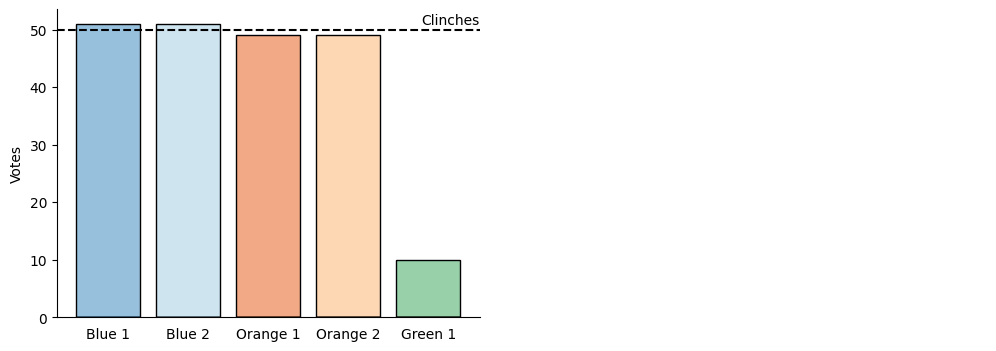

In [3]:
candidates = [("Blue 1", 51), ("Blue 2", 51), ("Orange 1", 49), ("Orange 2", 49), ("Green 1", 10)]
lines = [(50, "Clinches"),]
make_plot(candidates, lines)

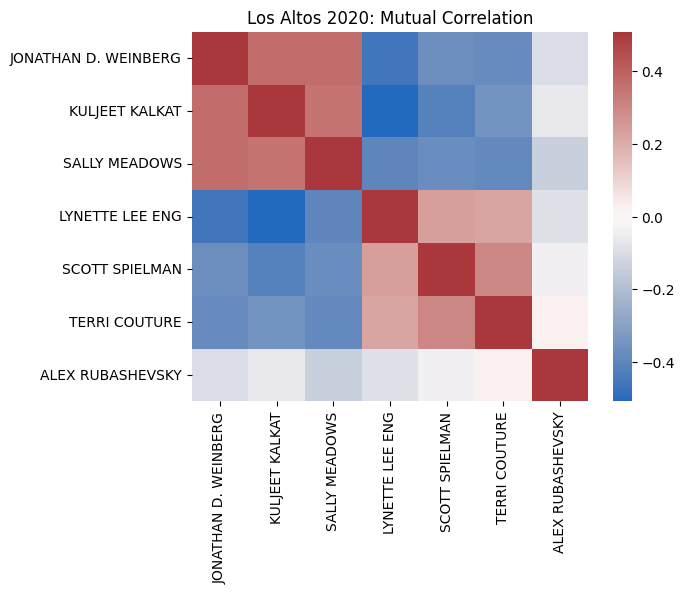

In [20]:
corr = pd.read_csv("los_altos_corr_2020.csv", index_col=0)
mask = np.eye(corr.shape[0], dtype=np.bool_)
limit = np.abs(corr.values[~mask]).max()
ax = sns.heatmap(corr, vmin=-limit, vmax=limit, cmap="vlag")
ax.set(xlabel="", ylabel="", title="Los Altos 2020: Mutual Correlation");

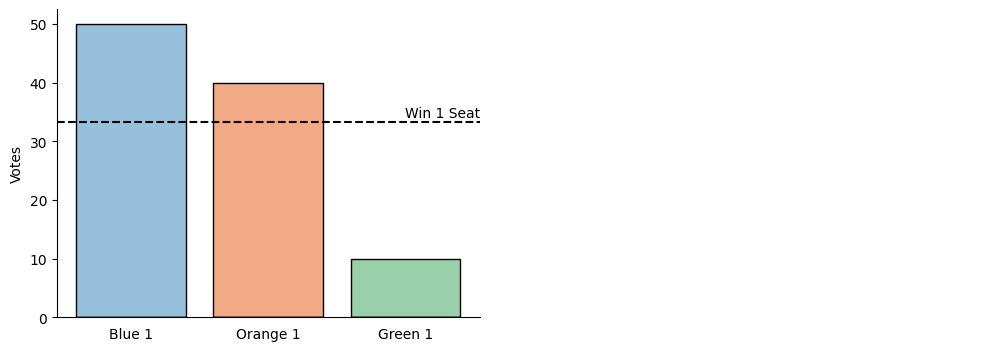

In [4]:
candidates = [("Blue 1", 50), ("Orange 1", 40), ("Green 1", 10)]
lines = [(33.33, "Win 1 Seat"),]
make_plot(candidates, lines)

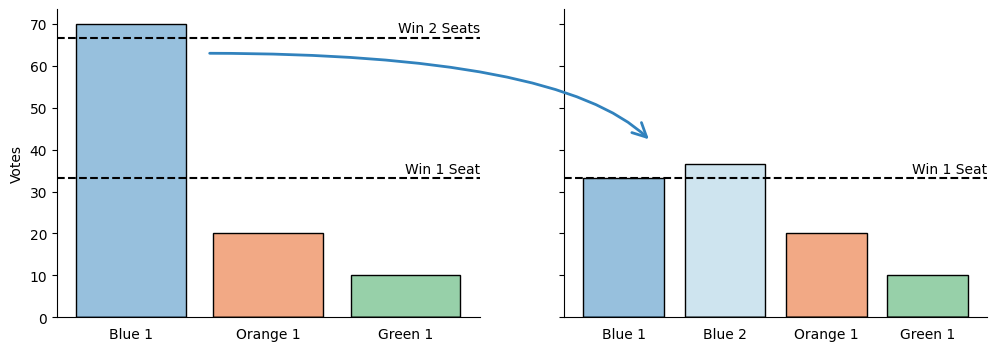

In [5]:
candidates0 = [("Blue 1", 70), ("Orange 1", 20), ("Green 1", 10)]
lines0 = [(33.33, "Win 1 Seat"), (66.67, "Win 2 Seats")]
candidates1 = [("Blue 1", 33.33), ("Blue 2", 70-33.33), ("Orange 1", 20), ("Green 1", 10)]
lines1 = [(33.33, "Win 1 Seat")]
arrow_ends = [(0.25, 0.77), (0.62, 0.55)]
make_plot(candidates0, lines0, candidates1, lines1, arrow_ends)

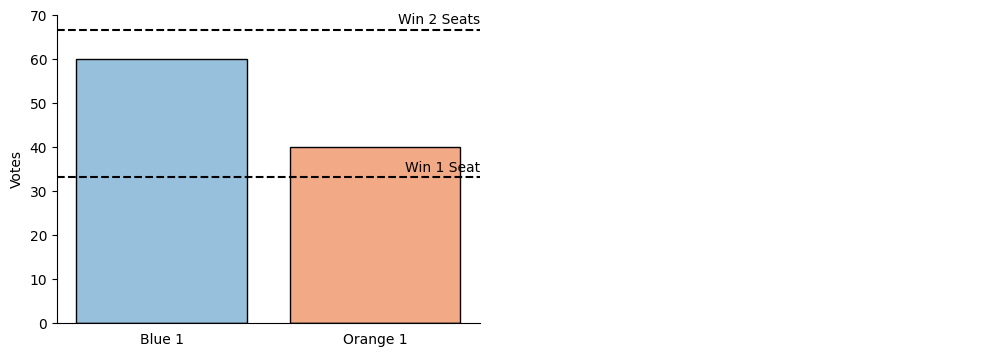

In [6]:
candidates = [("Blue 1", 60), ("Orange 1", 40)]
lines = [(33.33, "Win 1 Seat"), (66.67, "Win 2 Seats")]
make_plot(candidates, lines)

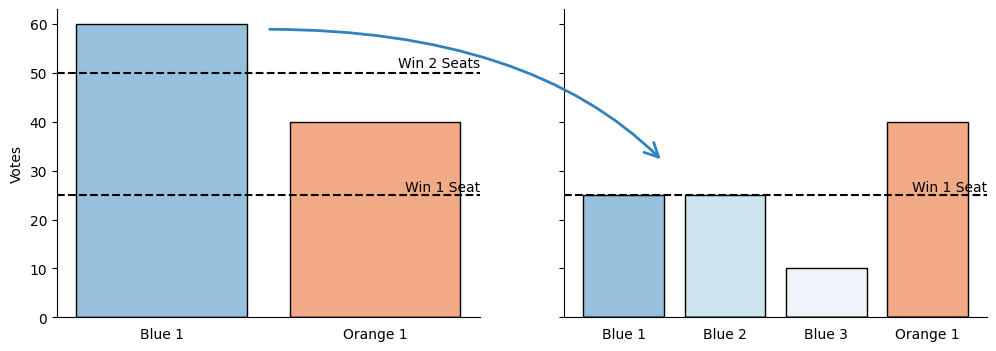

In [7]:
candidates0 = [("Blue 1", 60), ("Orange 1", 40)]
lines0 = [(25, "Win 1 Seat"), (50, "Win 2 Seats")]

candidates1 = [("Blue 1", 25), ("Blue 2", 25), ("Blue 3", 10), ("Orange 1", 40)]
lines1 = [(25, "Win 1 Seat")]

arrow_ends = [(0.3, 0.83), (0.63, 0.5)]
make_plot(candidates0, lines0, candidates1, lines1, arrow_ends)